# Data Storytelling
This notebook is for the purpose of data storytelling. In other words, to highlight key first insights about the analysis prior to building a predictive model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Allows better display of DataFrames
from IPython.display import display

# Create DataFrame from CSV file
df = pd.read_csv('countries_clean.csv')

In [3]:
df.head(5)

,Unnamed: 0,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,5,Argentina,Latin America,41.09,0.83,13540.00,0.78,0.79,0.29,1.08,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.45,6


# Relationships with Biocapaity Deficit or Reserve

## People-related Data

### Biocapacity Deficit or Reserve vs. Population

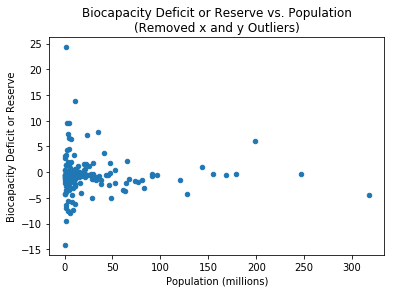

In [4]:
df1 = df[df['Biocapacity Deficit or Reserve'] < 60]
df1 = df1[df1['Population (millions)'] < 1200]

df1.plot.scatter(x='Population (millions)',
                y='Biocapacity Deficit or Reserve')
plt.title('Biocapacity Deficit or Reserve vs. Population\n(Removed x and y Outliers)')

plt.show()

Here we see that small populations have a lot of variation in their biocapacity deficit or reserve, but populations larger than ~50 vary significantly less. This is true with or witout outliers shown.

### Biocapacity Deficit or Reserve vs. GDP per Capita

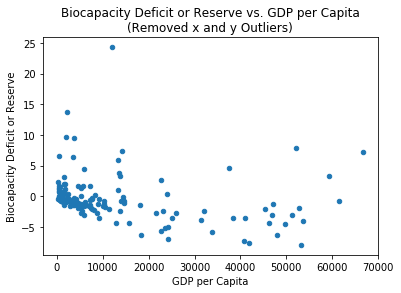

In [5]:
df1 = df[df['Biocapacity Deficit or Reserve'] < 60]
df1 = df1[df1['GDP per Capita'] < 70000]

df1.plot.scatter(x='GDP per Capita',
                y='Biocapacity Deficit or Reserve')
plt.title('Biocapacity Deficit or Reserve vs. GDP per Capita\n(Removed x and y Outliers)')

plt.show()

There seems to be a large cluster of countries with a low GDP and a biocapacity deficit. As GDP increases, this deficit increases. It appears that the trend is explain by highly capitalistic societies consuming more resources than they produce as the focus on solely economic gains.

### Biocapacity Deficit Reserve vs. HDI

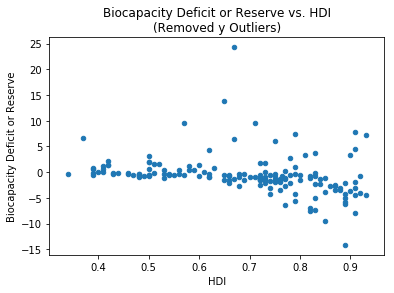

In [6]:
df1 = df[df['Biocapacity Deficit or Reserve'] < 60]

df1.plot.scatter(x='HDI',
                y='Biocapacity Deficit or Reserve')
plt.title('Biocapacity Deficit or Reserve vs. HDI\n(Removed y Outliers)')

plt.show()

This data shows an overall slightly negative correlation, meaning countries with higher HDI are more likely to have  deficits than reserves. However, at the same time, the data also becomes more varied as HDI increases suggesting that countries with lower HDIs are more likely to behave similarly. Having a high HDI suggests more financial resources, so the variance in biocapacity deficit or reserve here show that having the same HDI value does not mean countries have the same ethical values in terms of what issues they value most (e.g., environmental vs. business).

## Footprints

### Biocapacity Deficit or Reserve vs. Carbon Footprint

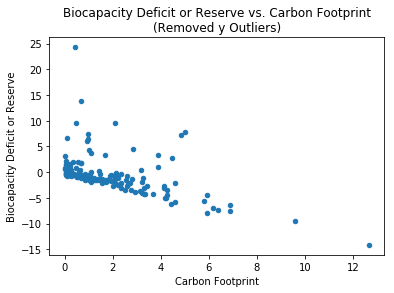

In [7]:
df1 = df[df['Biocapacity Deficit or Reserve'] < 60]

df1.plot.scatter(x='Carbon Footprint',
                y='Biocapacity Deficit or Reserve')
plt.title('Biocapacity Deficit or Reserve vs. Carbon Footprint\n(Removed y Outliers)')

plt.show()

The strong negative correlation here suggests that Carbon Footprint is a major contributor to Biocapacity Deficit.

## Reserves

### Biocapacity Deficit or Reserve vs. Grazing Land

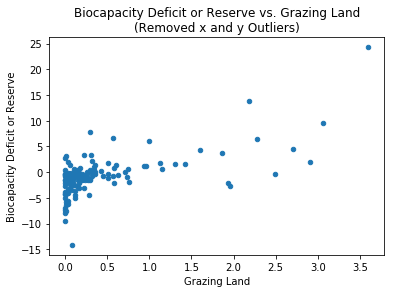

In [8]:
df1 = df[df['Biocapacity Deficit or Reserve'] < 60]
df1 = df1[df1['Grazing Land'] < 4]

df1.plot.scatter(x='Grazing Land',
                y='Biocapacity Deficit or Reserve')
plt.title('Biocapacity Deficit or Reserve vs. Grazing Land\n(Removed x and y Outliers)')

plt.show()

Here we see an overall slightly positive correlation, suggesting Grazing land is an important contributor to Biocapacity Reserve.

### Biocapacity Deficit or Reserve vs. Forest Land

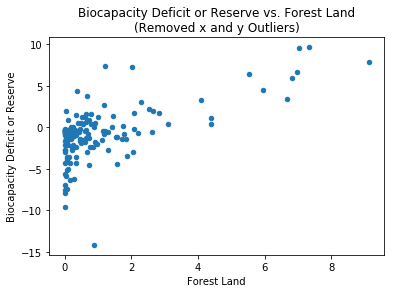

In [9]:
df1 = df[df['Biocapacity Deficit or Reserve'] < 60]
df1 = df1[df1['Forest Land'] < 10]

df1.plot.scatter(x='Forest Land',
                y='Biocapacity Deficit or Reserve')
plt.title('Biocapacity Deficit or Reserve vs. Forest Land\n(Removed x and y Outliers)')

plt.show()

Some positive correlation, suggesting that forest land is an important contributor to biocapacity reserve.

### Stacked Bar Chart: Footprints

<a href="https://stackoverflow.com/questions/54102370/matplotlib-stacked-bar-plot-need-to-swap-x-and-height">StackOverflow question</a>

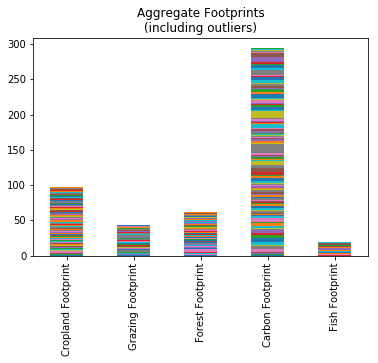

In [10]:
footprints = ['Cropland Footprint', 'Grazing Footprint', 'Forest Footprint', 'Carbon Footprint', 'Fish Footprint']
data = df[footprints].T
footPlot = data.plot.bar(stacked=True, legend=False)
plt.title('Aggregate Footprints\n(including outliers)')

plt.show()

Carbon footprint is by far the most significant contributor to Biocapacity Deficit.

### Stacked Bar Chart: Reserves

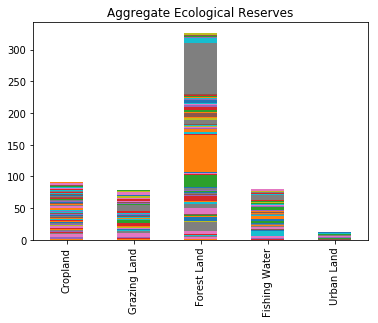

In [11]:
reserves = ['Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water', 'Urban Land']
data = df[reserves].T
resPlot = data.plot.bar(stacked=True, legend=False)
plt.title("Aggregate Ecological Reserves")

plt.show()

Forest land is by far the largest reserve we have (even with outliers removed, as shown below). This is a bit shocking because, in the news, we hear most about how destroying our forests by replacing them with malls or other urban land is contributing so much to global warming. However, because forests are needed to curb CO2 production, it makes sense that loss of any forest would be considered dire if what we currently have is not enough to prevent global warmining issues.

There must be another relationship to probe, here.

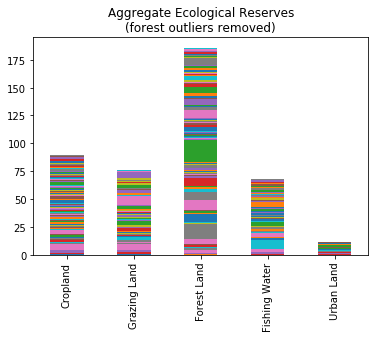

In [12]:
df1 = df[df['Forest Land'] < 40]

reserves = ['Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water', 'Urban Land']
data = df1[reserves].T
resPlot = data.plot.bar(stacked=True, legend=False)
plt.title("Aggregate Ecological Reserves\n(forest outliers removed)")

plt.show()